In [1]:
from DAQAWG import *
from nptdms import TdmsFile
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
Data_gen(duration = 10, tail_len = 0, sr = 500_000, csv_file = "Data_different_processparams_28_05_2025.csv", center = 2.5, amplitude = 5)

C:\Users\quant\AppData\Roaming\Python\Python312\site-packages\stochastic\processes\diffusion\diffusion.py:114: RuntimeWarning: invalid value encountered in scalar power
  + self._vol(t) * initial ** self._volexp(initial) * gns[k]


KeyboardInterrupt: 

In [3]:
# DAQ_one_col('LongOUJump.csv', "LongOUData", sr=500_000, duration = 1000)

Column 0: OUProcess0
Error with column 0: The requested memory could not be allocated.

Task Name: _unnamedTask<0>

Status Code: -50352
Column 1: OUProcess1
Error with column 1: The requested memory could not be allocated.

Task Name: _unnamedTask<2>

Status Code: -50352
Column 2: OUProcess2
Error with column 2: The requested memory could not be allocated.

Task Name: _unnamedTask<4>

Status Code: -50352
Column 3: OUProcess3
Error with column 3: The requested memory could not be allocated.

Task Name: _unnamedTask<6>

Status Code: -50352
Column 4: OUProcess4
Error with column 4: The requested memory could not be allocated.

Task Name: _unnamedTask<8>

Status Code: -50352
Column 5: OUProcess5
Error with column 5: The requested memory could not be allocated.

Task Name: _unnamedTask<A>

Status Code: -50352
Column 6: OUProcess6
Error with column 6: The requested memory could not be allocated.

Task Name: _unnamedTask<C>

Status Code: -50352
Column 7: OUProcess7
Error with column 7: The re

In [ ]:
DAQ_one_col('LongOU.csv', "LongOU", sr=500_000, duration = 1000)

In [135]:
amplitude = 5
center = 2.5
samples_per_bunch = 5_000
sr = 500_000
duration = 1000
tail_len = 0
csv_file = "LongOU.csv"
NR_OF_JUMPS = 0 #per bunch

from stochastic.processes.diffusion import *
import numpy as np

process = OrnsteinUhlenbeckProcess(speed=5, vol=5)
samples = process.sample(samples_per_bunch)[:samples_per_bunch]
if NR_OF_JUMPS > 0:
    jump = np.repeat(
        np.random.uniform(center - amplitude/2, center + amplitude/2, NR_OF_JUMPS), 
        samples_per_bunch/NR_OF_JUMPS
        )
    samples += jump
scaled = (samples - np.min(samples))
scaled = amplitude*scaled/np.max(scaled) - amplitude/2 + center



In [136]:
if duration%100 != 0:
    print("Failed, duration must be divisible by 100")
all_values = np.zeros((int(duration/100), 100*sr))
keys = ["OUProcess" + str(i) for i in range(int(duration/100))]

for i in range(int(duration/100)):
 
    values = []
    print("col", i)
    for _ in range(int(100*sr/samples_per_bunch)):
        process = OrnsteinUhlenbeckProcess(speed=5, vol=5)
        samples = process.sample(samples_per_bunch)[:samples_per_bunch]
        # if NR_OF_JUMPS > 0:
        #     jump = np.repeat(
        #         np.random.uniform(center - amplitude/2, center + amplitude/2, NR_OF_JUMPS), 
        #         samples_per_bunch/NR_OF_JUMPS
        #         )
        #     samples += jump
        scaled = (samples - np.min(samples))
        scaled = amplitude*scaled/np.max(scaled) - amplitude/2 + center

        values.append(scaled)

    all_values[i] = np.concatenate(values)
pd.DataFrame(all_values.T, columns=keys).to_csv(csv_file, index=False)

col 0
col 1
col 2
col 3
col 4
col 5
col 6
col 7
col 8
col 9


KeyboardInterrupt: 

In [147]:
pd.DataFrame(all_values.T, columns=keys).to_csv(csv_file, index=False)

In [150]:

def DAQ_one_col(csv_file, data_file_name, sr, duration):
    cols = pd.read_csv(csv_file, nrows=0).columns
    for i in range(len(cols)):
        print(f"Column {i}: {cols[i]}")
        try:
            DAQ(
            sr = sr, #Sampling rate in Hz
            duration = duration, 
            data_file = data_file_name, #name of the output file without extension
            column = 0, #Column to read from the CSV file
            csv_file_name= csv_file
            )
        except Exception as e:
            print(f"Error with column {i}: {e}")
            continue

Column 0: OUProcess0
Error with column 0: The requested memory could not be allocated.

Task Name: _unnamedTask<8C>

Status Code: -50352
Column 1: OUProcess1
Error with column 1: The requested memory could not be allocated.

Task Name: _unnamedTask<8E>

Status Code: -50352
Column 2: OUProcess2
Error with column 2: The requested memory could not be allocated.

Task Name: _unnamedTask<90>

Status Code: -50352
Column 3: OUProcess3
Error with column 3: The requested memory could not be allocated.

Task Name: _unnamedTask<92>

Status Code: -50352
Column 4: OUProcess4
Error with column 4: The requested memory could not be allocated.

Task Name: _unnamedTask<94>

Status Code: -50352
Column 5: OUProcess5
Error with column 5: The requested memory could not be allocated.

Task Name: _unnamedTask<96>

Status Code: -50352
Column 6: OUProcess6
Error with column 6: The requested memory could not be allocated.

Task Name: _unnamedTask<98>

Status Code: -50352
Column 7: OUProcess7
Error with column 7:

In [ ]:
DAQ_one_col('LongOU.csv', "LongOU", sr=500_000, duration = 1000)

Index(['/'SamplingRate500000Time10sBessel process'/'Dev1/ai0'',
       '/'SamplingRate500000Time10sBessel process'/'Dev1/ai1'',
       '/'SamplingRate500000Time10s4.999999999999982236e-02'/'Dev1/ai0'',
       '/'SamplingRate500000Time10s4.999999999999982236e-02'/'Dev1/ai1'',
       '/'SamplingRate500000Time10s4.999999999999982236e-02 #1'/'Dev1/ai0'',
       '/'SamplingRate500000Time10s4.999999999999982236e-02 #1'/'Dev1/ai1'',
       '/'SamplingRate500000Time10sBessel process #1'/'Dev1/ai0'',
       '/'SamplingRate500000Time10sBessel process #1'/'Dev1/ai1'',
       '/'SamplingRate500000Time1sBessel process'/'Dev1/ai0'',
       '/'SamplingRate500000Time1sBessel process'/'Dev1/ai1'',
       '/'SamplingRate500000Time1s4.999999999999982236e-02'/'Dev1/ai0'',
       '/'SamplingRate500000Time1s4.999999999999982236e-02'/'Dev1/ai1'',
       '/'SamplingRate500000Time1s4.999999999999982236e-02 #1'/'Dev1/ai0'',
       '/'SamplingRate500000Time1s4.999999999999982236e-02 #1'/'Dev1/ai1'',
       '/'Sa

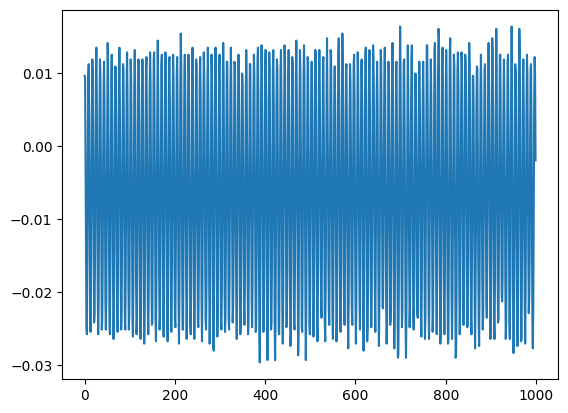

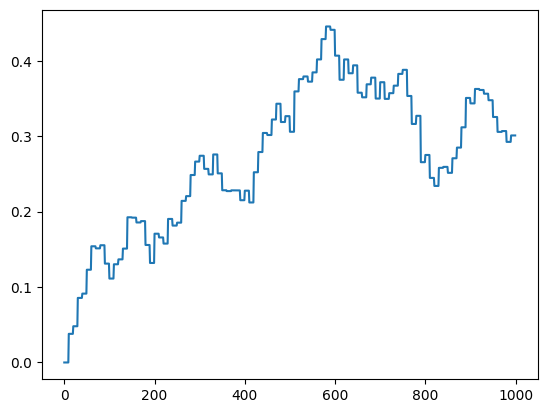

In [76]:
tdms_file = TdmsFile.read("Test.tdms")
DAQ_test = tdms_file.as_dataframe()
print(DAQ_test.columns)
plt.plot(DAQ_test.iloc[:,-1 ][:1_000])
plt.show()
# plt.plot(pd.read_csv("C:\gwd-python-programs\square_wave.csv", usecols=[0], nrows = 10000))
# plt.show()
plt.plot(np.repeat(pd.read_csv("Data_28_05_2025.csv", usecols=[0], nrows = 100), 10))

# # DAQ_test.columns

In [16]:
from nptdms import TdmsFile
tdms_file = TdmsFile.read("test3.tdms")
DAQ_test = tdms_file.as_dataframe()


## Test

In [69]:
import nidaqmx as ni
from nidaqmx import stream_readers, stream_writers
import pandas as pd
import numpy as np

csv_file_name = "Data_28_05_2025.csv"

def read_chunk_from_csv(
        csv_file_name = csv_file_name,
        sr = 50_000, # Sampling rate in Hz
        column = 0 # Column to read from the CSV file
):
    '''
    Reads a chunk of data from a CSV file and returns it as a numpy array, that fits the DAQ.
    '''
    chunk_reader = pd.read_csv(csv_file_name, chunksize = sr/10, usecols = [column])
    while True:
        chunk = np.repeat(next(chunk_reader).to_numpy()[:,0], 10)
        data = np.repeat(np.expand_dims(chunk, axis = 1), 2, axis =1).T
        yield np.ascontiguousarray(data)

sr = 500_000 #Sampling rate in Hz
duration = 1 
data_file = 'Test' #name of the output file without extension
column = 0 #Column to read from the CSV file
csv_file_name = "test.csv" #name of the input CSV file

input_mapping = ['Dev1/ai0', 'Dev1/ai1'] #Devices to read from
output_mapping = ['Dev1/ao0', 'Dev1/ao1'] #Devices to write to
ao_args = {'min_val': -10,
        'max_val': 10} #Arguments for the output channels
ai_args = {'min_val': -10, #Arguments for the input channels
        'max_val': 10,
        'terminal_config': ni.constants.TerminalConfiguration.RSE}


nsamples = sr*duration

#Column names in the TDMS file
group_name = "SamplingRate" + str(sr) + "Time" + str(duration) + "s" + pd.read_csv(csv_file_name, nrows=0).columns[column]

with ni.Task() as read_task, ni.Task() as write_task:
    for o in output_mapping:
        write_task.ao_channels.add_ao_voltage_chan(o, **ao_args)

    for i in input_mapping:
        read_task.ai_channels.add_ai_voltage_chan(i, **ai_args)

    for task in (read_task, write_task):
        task.timing.cfg_samp_clk_timing(rate=sr, source='OnboardClock', samps_per_chan=nsamples)
    

    read_task.in_stream.configure_logging(data_file + ".tdms", group_name = group_name)

    # reader = stream_readers.AnalogMultiChannelReader(read_task.in_stream)
    writer = stream_writers.AnalogMultiChannelWriter(write_task.out_stream)

    write_task.triggers.start_trigger.cfg_dig_edge_start_trig(read_task.triggers.start_trigger.term)
    writer.write_many_sample(next(read_chunk_from_csv(csv_file_name=csv_file_name, sr=sr, column = column)), timeout=0)

    write_task.start()
    read_task.start()

    read_task.read(nsamples)

In [16]:
test = pd.read_csv('test.csv')
test

,Bessel process,Brownian bridge,Brownian excursion,Brownian meander process,Brownian motion,Symmetric Cauchy process,Fractional Brownian motion process,Gamma process,Geometric Brownian motion process,Inverse Gaussian process,...,Vasicek process,Gaussian noise process,Fractional Gaussian noise process,Blue noise,Brownian (red) noise,Colored noise processes,Red (Brownian) noise,Pink (flicker) noise,Violet noise,White noise
0,5.000000,7.812354,5.000000,5.000000,8.708136,5.324793,7.279524,5.0,9.678837,5.000000,...,6.851324,7.601459,5.808083,7.580010,7.706907,9.452750,7.120748,7.056036,7.169935,6.895628
1,5.045395,7.822517,5.040089,5.056955,8.681349,5.324592,7.238040,5.0,9.697521,5.000001,...,6.909848,8.057265,6.928743,8.202294,7.753537,8.044576,7.067198,7.313551,7.321846,6.776160
2,5.058885,7.769497,5.109719,5.114029,8.721495,5.325563,7.172601,5.0,9.733165,5.000002,...,6.867783,6.303326,7.643729,6.803734,7.730858,8.669461,7.016669,7.019667,7.433946,7.779686
3,5.031450,7.687265,5.149515,5.160398,8.719260,5.325678,7.212250,5.0,9.623296,5.000003,...,6.849796,7.978064,7.772797,7.684355,7.798605,7.861913,6.975880,7.572487,6.986664,6.787108
4,5.158793,7.749505,5.203403,5.119007,8.774060,5.325835,7.243367,5.0,9.749348,5.000004,...,6.910617,7.314260,6.978918,6.956249,7.755181,7.717630,6.915350,7.768510,7.051698,7.659991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.5,7.500000,7.500000,...,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000
49996,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.5,7.500000,7.500000,...,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000
49997,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.5,7.500000,7.500000,...,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000
49998,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.5,7.500000,7.500000,...,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000


In [17]:
test.columns

Index(['Bessel process', 'Brownian bridge', 'Brownian excursion',
       'Brownian meander process', 'Brownian motion',
       'Symmetric Cauchy process', 'Fractional Brownian motion process',
       'Gamma process', 'Geometric Brownian motion process',
       'Inverse Gaussian process', 'Mixed poisson process', 'Poisson process',
       'Squared Bessel process', 'Variance Gamma process',
       'Wiener process, or standard Brownian motion',
       'Generalized diffusion process',
       'Constant elasticity of variance process', 'Cox-Ingersoll-Ross process',
       'Ornstein-Uhlenbeck process', 'Vasicek process',
       'Gaussian noise process', 'Fractional Gaussian noise process',
       'Blue noise', 'Brownian (red) noise', 'Colored noise processes',
       'Red (Brownian) noise', 'Pink (flicker) noise', 'Violet noise',
       'White noise'],
      dtype='object')

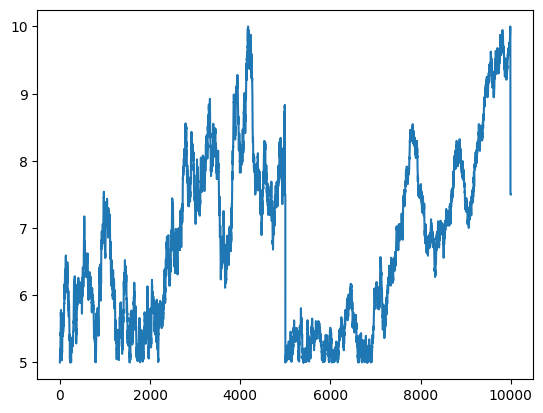

In [18]:
plt.plot(test['Bessel process'][:10000])

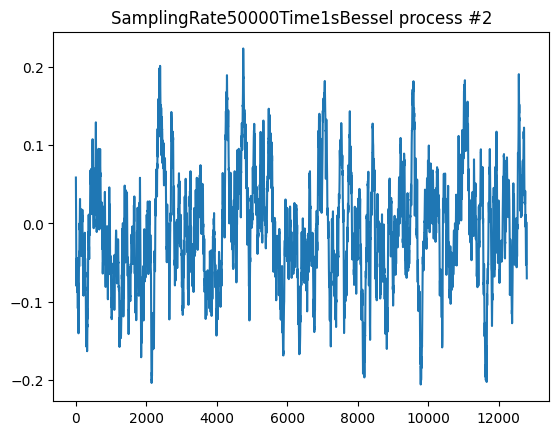

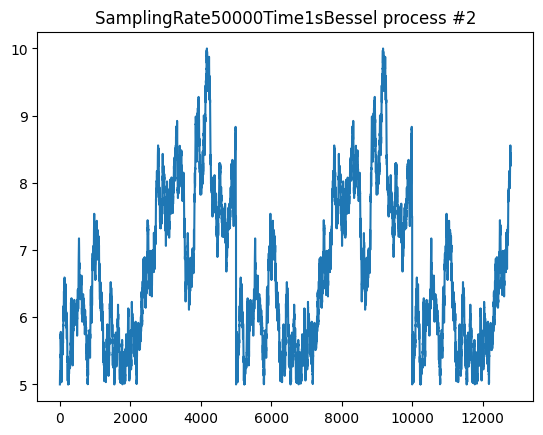

In [8]:
# Data_gen()
# DAQ()
with TdmsFile.open("test3.tdms") as tdms_file:
    for channel in tdms_file.groups()[-1].channels(): #Reads the last group
        # print(next(channel.data_chunks())[:5000])
        plt.plot(next(channel.data_chunks()))
        plt.title(tdms_file.groups()[-1].name)
        plt.show()

In [5]:
tdms_file = TdmsFile.read("test3.tdms")
DAQ_test = tdms_file.as_dataframe()

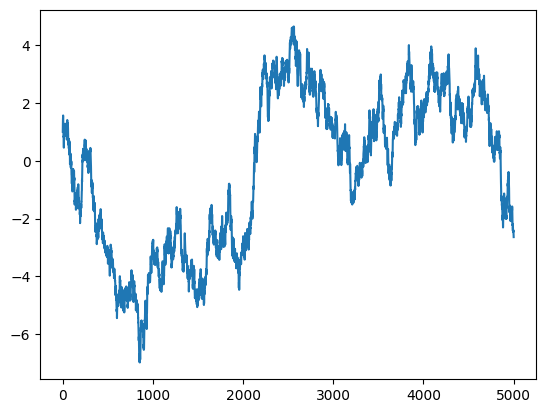

In [398]:
import stochastic
import numpy as np
random_numbers = [1]
i = 0
asd =  stochastic.processes.diffusion.DiffusionProcess(speed=10*random_numbers[i], mean=0, vol=10, volexp=0, t=1, rng=None) #

plt.plot(asd.sample(5000))

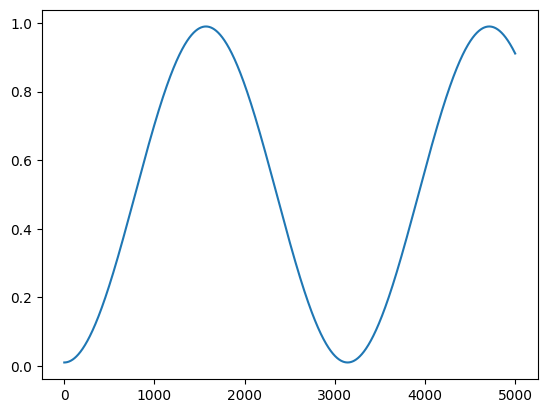

In [249]:
x = np.linspace(0, 1, 5000)
plt.plot((np.sin(5*x)**2)*0.98+ 0.01)

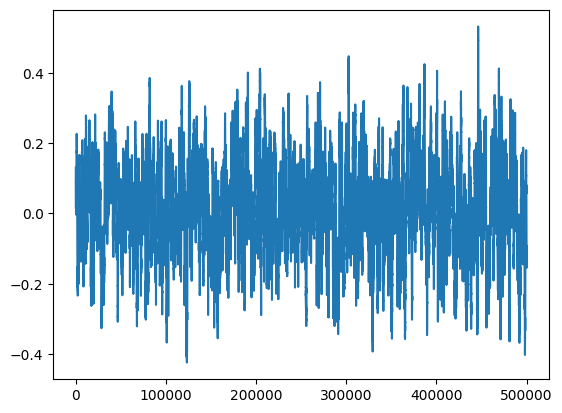

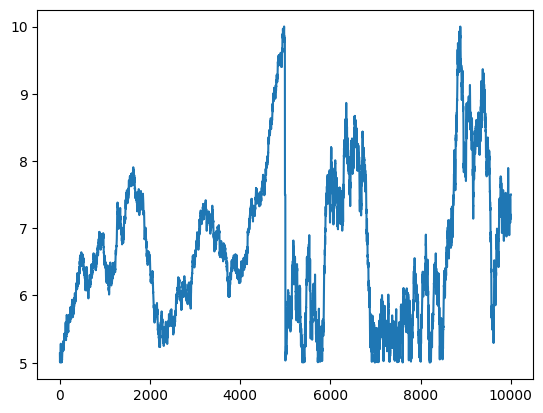